### Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv("/content/c4_epa_air_quality.csv")


### Data Exploration

In [4]:
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


In [8]:
df.shape

(260, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   aqi_log           260 non-null    float64
dtypes: float64(1), object(7)
memory usage: 16.4+ KB


In [6]:
df['date_local']=pd.to_datetime(df['date_local'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_local        260 non-null    datetime64[ns]
 1   state_name        260 non-null    object        
 2   county_name       260 non-null    object        
 3   city_name         260 non-null    object        
 4   local_site_name   257 non-null    object        
 5   parameter_name    260 non-null    object        
 6   units_of_measure  260 non-null    object        
 7   aqi_log           260 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 16.4+ KB


<Axes: >

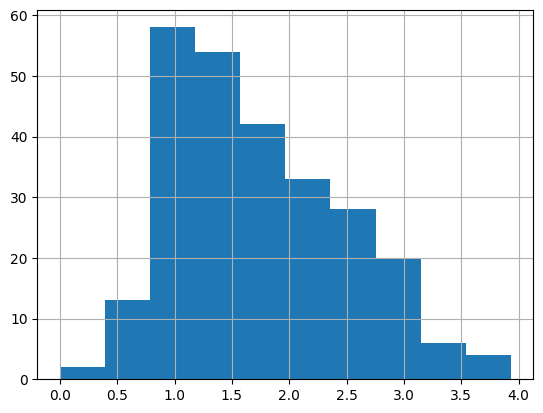

In [9]:
df['aqi_log'].hist()

we can see that the 'aqi_log' column is not exactly normally distributed, but we can say that it is approximately normal.


we can make sure from that using the empirical rule.

The empirical rule states that, for every normal distribution:


*   68% of the data fall within 1 standard deviation of the mean
*   95% of the data fall within 2 standard deviations of the mean
*   99.7% of the data fall within 3 standard deviations of the mean









In [18]:
# The mean of 'aqi_log' column
aqi_log_mean=df['aqi_log'].mean()

# The standard deviation of 'aqi_log' column
aqi_log_std = df["aqi_log"].std()

print(aqi_log_mean,aqi_log_std)

1.7669210929985582 0.7147155520223721


In [20]:
# 1 standard deviation below the mean.
lower_limit = aqi_log_mean - 1 * aqi_log_std



# 1 standard deviation above the mean.

upper_limit = aqi_log_mean + 1 * aqi_log_std



print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


**the first part of the empirical rule: whether 68% of the aqi_log data falls within 1 standard deviation of the mean.**

In [21]:
( (df['aqi_log']<=upper_limit) & (df['aqi_log']>=lower_limit) ).mean()*100

76.15384615384615

In [22]:
# 2 standard deviation below the mean.
lower_limit = aqi_log_mean - 2 * aqi_log_std



# 2 standard deviation above the mean.

upper_limit = aqi_log_mean + 2 * aqi_log_std



print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


**the second part of the empirical rule: whether 95% of the aqi_log data falls within 2 standard deviations of the mean.**

In [24]:
( (df['aqi_log']<=upper_limit) & (df['aqi_log']>=lower_limit) ).mean()*100

95.76923076923077

In [25]:
# 3 standard deviation below the mean.
lower_limit = aqi_log_mean - 3 * aqi_log_std



# 3 standard deviation above the mean.

upper_limit = aqi_log_mean + 3 * aqi_log_std


print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


**The third part of the empirical rule:whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.**

In [26]:
( (df['aqi_log']<=upper_limit) & (df['aqi_log']>=lower_limit) ).mean()*100

99.61538461538461

We conclude that:


*   About 76.15% of AQI readings fall within 1 standard deviation of the mean

*   About 95.76% of AQI readings fall within 2 standard deviation of the mean


*   About 99.61% of AQI readings fall within 3 standard deviation of the mean




We can detect the outliers in the data using the z-scores

In [29]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
df["z_score"] = stats.zscore(df["aqi_log"])

df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [30]:
# The data points where `aqi_log` is above or below 3 standard deviations of the mean
df[(df["z_score"] > 3) | (df["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


We notice that The aqi_log for West Phoenix is above 3 standard deviations of the mean. so it is considered as an outlier.

We should give it more focus to improve the air quality in it.